In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model, layers
from glob import glob
from PIL import Image
import os
import zipfile
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [2]:
!pip install sklearn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 9.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 7.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2381 sha256=f2ce1e477c65a9aa3cf572604dc0218b739256f2c801896dadf36ae8ad0d7b3c
  Stored in directory: /root/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
# GPU 할당 상태 확인

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:
# !unzip -uq 'test-20220603T000915Z-001.zip' -d 'test'

In [4]:
# !unzip -uq 'train-20220603T000944Z-001.zip' -d 'train'

In [5]:
# !unzip -uq 'valid-20220603T000946Z-001.zip' -d 'valid'

In [5]:
image_dates_train_nak = glob('./test/1*.jpg')

In [6]:
# 데이터 packing

image_dates_train_nak = glob('./train/1*.jpg')
image_dates_train_scub = glob('./train/2*.jpg')
image_dates_train_oster = glob('./train/3*.jpg')

image_dates_valid_nak = glob('./valid/1*.jpg')
image_dates_valid_scub = glob('./valid/2*.jpg')
image_dates_valid_oster = glob('./valid/3*.jpg')

image_dates_test_nak = glob('./test/1*.jpg')
image_dates_test_scub = glob('./test/2*.jpg')
image_dates_test_oster = glob('./test/3*.jpg')

class_name = ['nacksungdae','scubhome', 'osteria']
dic = {'nacksungdae' : 0, 'scubhome' : 1, 'osteria' : 2}

In [7]:
X_train = []
Y_train = []
X_valid = []
Y_valid = []
X_test = []
Y_test = []

for imagename in image_dates_train_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(0)
    
for imagename in image_dates_train_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(1)    
    
for imagename in image_dates_train_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_train.append(image)
    Y_train.append(2)
    
for imagename in image_dates_valid_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(0)
    
for imagename in image_dates_valid_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(1)    
    
for imagename in image_dates_valid_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_valid.append(image)
    Y_valid.append(2)
    
for imagename in image_dates_test_nak:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(0)
    
for imagename in image_dates_test_scub:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(1)    
    
for imagename in image_dates_test_oster:
    image = Image.open(imagename)
    #image = image.resize((imagesize_w, imagesize_h))
    image = np.array(image)
    X_test.append(image)
    Y_test.append(2)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train.shape, Y_train.shape)
print(X_valid.shape, Y_valid.shape)
print(X_test.shape, Y_test.shape)

(9180, 200, 200, 3) (9180,)
(3060, 200, 200, 3) (3060,)
(3060, 200, 200, 3) (3060,)


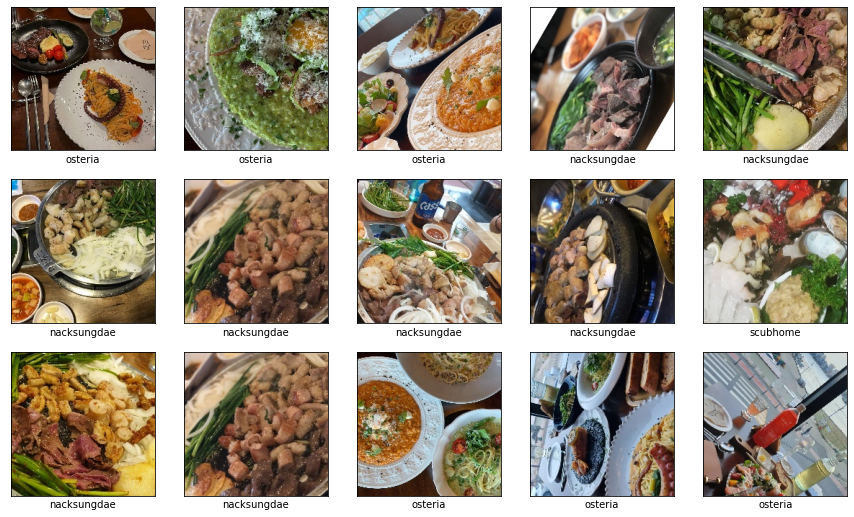

In [8]:
# train_images, test_images, train_labels, test_labels = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 44)

# print(train_images.shape, test_images.shape)
# print(train_labels.shape, test_labels.shape)
%matplotlib inline 
N_TRAIN = X_train.shape[0]
N_TEST = X_valid.shape[0]

plt.figure(figsize = (15, 9))

# train data image 확인

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(X_train[img_idx])
    plt.xlabel(class_name[Y_train[img_idx]])

In [9]:
#데이터 클래스가 잘 나뉘었는지 확인

unique, counts = np.unique(np.reshape(Y_train, (N_TRAIN,)), axis = -1, return_counts = True)
dict(zip(unique, counts))

{0: 3060, 1: 3060, 2: 3060}

In [10]:
#min-max scaling

X_train = X_train.astype(np.float32) / 255
X_valid = X_valid.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

x_train = X_train.reshape(-1, 200, 200, 3)
x_test = X_test.reshape(-1, 200, 200, 3)
x_valid = X_valid.reshape(-1, 200, 200, 3)

y_train = Y_train
y_test = Y_test
y_valid = Y_valid


print('train data : X ', x_train.shape, ' Y ', y_train.shape)
print('valid data : X ', x_valid.shape, ' Y ', y_valid.shape)
print('test data : X ', x_test.shape, ' Y ', y_test.shape)

data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

train data : X  (9180, 200, 200, 3)  Y  (9180,)
valid data : X  (3060, 200, 200, 3)  Y  (3060,)
test data : X  (3060, 200, 200, 3)  Y  (3060,)


### Model 1

In [18]:
cnn = Sequential()

cnn.add(layers.Conv2D(32, 3, strides=1, padding='same', activation='relu', input_shape=(200, 200, 3))) 
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Conv2D(64, 3, strides=1, padding='same', activation='relu'))
cnn.add(layers.MaxPool2D(3, strides=2, padding='same'))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation='relu'))
cnn.add(layers.Dense(3, activation='softmax'))

In [19]:
cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(learning_rate=0.1), metrics = ['accuracy'])

In [20]:
result = cnn.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid))

Epoch 1/20
287/287 [==============================] - 9s 31ms/step - loss: 1.1243 - accuracy: 0.3562 - val_loss: 1.1008 - val_accuracy: 0.3333
Epoch 2/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0995 - accuracy: 0.3328 - val_loss: 1.0990 - val_accuracy: 0.3333
Epoch 3/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0991 - accuracy: 0.3260 - val_loss: 1.0740 - val_accuracy: 0.3516
Epoch 4/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0972 - accuracy: 0.3364 - val_loss: 1.0991 - val_accuracy: 0.3333
Epoch 5/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0994 - accuracy: 0.3273 - val_loss: 1.0989 - val_accuracy: 0.3333
Epoch 6/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0993 - accuracy: 0.3329 - val_loss: 1.0988 - val_accuracy: 0.3333
Epoch 7/20
287/287 [==============================] - 8s 27ms/step - loss: 1.0993 - accuracy: 0.3330 - val_loss: 1.0992 - val_accuracy: 0.3333

In [21]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

96/96 [==============================] - 1s 10ms/step - loss: 1.0999 - accuracy: 0.3333
test loss:  1.0998703241348267
test acc:  0.3333333432674408


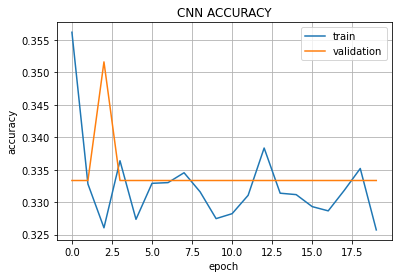

In [22]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('CNN ACCURACY')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['train','validation'], loc = 'best')

### Model 2

In [13]:
def train(net, x_train, y_train, x_valid, y_valid, x_test, y_test, epochs = 5):
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01)
    net.compile(loss = 'sparse_categorical_crossentropy',
                optimizer = optimizer,
                metrics = ['accuracy'])
    result = net.fit(x_train, y_train, epochs = epochs, batch_size = 128,
                     validation_data = (x_valid, y_valid), verbose = 1)
    
    plt.plot(result.history['accuracy'])
    plt.plot(result.history['val_accuracy'])
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['train', 'validation'], loc = 'best')
    plt.show()

def make_conv_block(num_filters, filter_size, stride, padding = 'same', input_shape = None):
    conv_block = Sequential()
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    conv_block.add(layers.Conv2D(num_filters,
                                 filter_size,
                                 strides = stride,
                                 padding = padding,
                                 activation = 'relu'))
    
    return conv_block


class CNN(Model):
    def __init__(self, num_classes = 10):
        super(CNN, self).__init__()
        self.convblock1 = make_conv_block(32, 3, 1)
        self.bn1 = layers.BatchNormalization()
        self.convblock2 = make_conv_block(32, 3, 1)
        self.maxpool1 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock3 = make_conv_block(64, 3, 1)
        self.bn2 = layers.BatchNormalization()
        self.convblock4 = make_conv_block(64, 3, 1)
        self.maxpool2 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.convblock5 = make_conv_block(32, 3, 1)
        self.bn3 = layers.BatchNormalization()
        self.convblock6 = make_conv_block(32, 3, 1)
        self.maxpool3 = layers.MaxPool2D(pool_size = 3,
                         strides = 2,
                         padding = 'same')
        
        self.flatten = layers.Flatten()
        
        self.fc1 = layers.Dense(128, activation = 'relu')
        self.fc2 = layers.Dense(64, activation = 'relu')
        
        self.fc3 = layers.Dense(num_classes, activation = 'softmax')
        
    
    def call(self, x):
        x = self.convblock1(x)
        x = self.bn1(x)
        x = self.convblock2(x)
        x = self.maxpool1(x)
        
        x = self.convblock3(x)
        x = self.bn2(x)
        x = self.convblock4(x)
        x = self.maxpool2(x)
        
        x = self.convblock5(x)
        x = self.bn3(x)
        x = self.convblock6(x)
        x = self.maxpool3(x)
        
        
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.fc2(x)
        
        x = self.fc3(x)
        
        return x



In [14]:
data = [x_train, y_train, x_valid, y_valid, x_test, y_test]

Epoch 1/5
72/72 [==============================] - 54s 748ms/step - loss: 0.8216 - accuracy: 0.6228 - val_loss: 1.1812 - val_accuracy: 0.3333
Epoch 2/5
72/72 [==============================] - 52s 724ms/step - loss: 0.4216 - accuracy: 0.8354 - val_loss: 1.7521 - val_accuracy: 0.3333
Epoch 3/5
72/72 [==============================] - 53s 735ms/step - loss: 0.2682 - accuracy: 0.8913 - val_loss: 3.1175 - val_accuracy: 0.3333
Epoch 4/5
72/72 [==============================] - 53s 737ms/step - loss: 0.1982 - accuracy: 0.9253 - val_loss: 4.1377 - val_accuracy: 0.3333
Epoch 5/5
72/72 [==============================] - 53s 737ms/step - loss: 0.1583 - accuracy: 0.9426 - val_loss: 4.9273 - val_accuracy: 0.3333


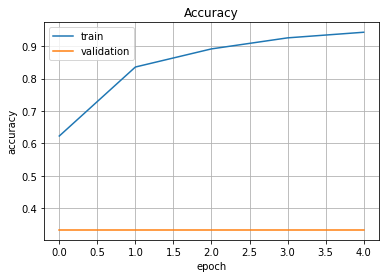

In [15]:
cnn2 = CNN(num_classes = 3)
train(cnn2, *data, epochs = 5)

In [16]:
test_result = cnn.evaluate(x_test, y_test)
print('test loss: ', test_result[0])
print('test acc: ', test_result[1])

96/96 [==============================] - 4s 46ms/step - loss: 4.9351 - accuracy: 0.3392
test loss:  4.9350972175598145
test acc:  0.3392156958580017


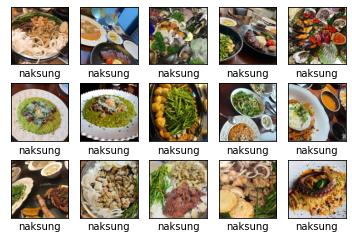

In [17]:
# 학습 결과 labeling

for i in range(15):
    img_idx = np.random.randint(0, N_TRAIN)
    im = np.reshape(x_train[img_idx], (-1, 200, 200, 3))
    classnum = np.argmax(cnn.predict(im))
    plt.subplot(3, 5, i+1)
    plt.xticks([])
    plt.yticks([])    
    plt.grid(False)
    plt.imshow(x_train[img_idx])
    name = ''
    if classnum == 0 : name = 'naksung'
    elif classnum == 1 : name = 'scub'
    else : name = 'osteria'
    plt.xlabel(name)